The goal is to create a data density map based on the information available in the index files.<br>
The index files don't contain the data locations, but rectangular boxes in which the data of each file are distributed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [16]:
indexfile_basedir = "/home/ctroupin/DataOceano/CMEMS/IndexFiles/"
indexfile_dirlist = ['Arctic', 'Baltic  BlackSea  Global  IBI  MedSea  NorthWestShelves",

Some functions we will use in the code.

In [17]:
def read_index_file_box(indexfile):
    dataindex = np.genfromtxt(indexfile, skip_header=6, unpack=True, delimiter=',', dtype=None, \
              names=['catalog_id', 'file_name', 'geospatial_lat_min', 'geospatial_lat_max',
                     'geospatial_lon_min', 'geospatial_lon_max',
                     'time_coverage_start', 'time_coverage_end', 
                     'provider', 'date_update', 'data_mode', 'parameters'])
    lon_min = dataindex['geospatial_lon_min']
    lon_max = dataindex['geospatial_lon_max']
    lat_min = dataindex['geospatial_lat_min']
    lat_max = dataindex['geospatial_lat_max']
    goodcoord = np.where((lon_max<=180.) & (lon_min>=-180.) & (lat_min>=-90.) & (lat_max<=90.))[0]
    return lon_min[goodcoord], lon_max[goodcoord], lat_min[goodcoord], lat_max[goodcoord]

In [18]:
def create_rectangle(lon_min, lon_max, lat_min, lat_max, lon_grid, lat_grid, resolution):
    lon_vec = np.zeros_like(lon_grid)
    lat_vec = np.zeros_like(lat_grid)
    lon_vec[(lon_grid >= lon_min - resolution) & (lon_grid <= lon_max + resolution)] = 1
    lat_vec[(lat_grid >= lat_min - resolution) & (lat_grid <= lat_max + resolution)] = 1
    rectangle = lat_vec.T*lon_vec
    return rectangle

# Read the index file

In [19]:
lon_min, lon_max, lat_min, lat_max = read_index_file_box(indexfile)

# Generate grid based on resolution

In [58]:
resolution = 1.
lon_grid = np.array([np.arange(-180., 180., resolution)],)
lat_grid = np.array([np.arange(-90., 90., resolution)],)

# Data count

Rectangle is a matrix containg 1's where inside the domain defined by the data coverage (lon/lat min/max). It is computed by a product of 2 vectors. 

In [59]:
rectangle_sum = np.zeros_like(lat_grid.T*lon_grid)
for lon_min0, lon_max0, lat_min0, lat_max0 in zip(lon_min, lon_max, lat_min, lat_max):
    rectangle = create_rectangle(lon_min0, lon_max0, lat_min0, lat_max0, lon_grid, lat_grid, resolution)
    rectangle_sum += rectangle

# Plot on the map

In [60]:
m = Basemap(lon_0=0, projection='robin')

In [61]:
lonmean = 0.5*(lon_min + lon_max)
latmean = 0.5*(lat_min + lat_max)
lonmeanmap, latmeanmap = m(lonmean, latmean)

In [62]:
llon, llat = np.meshgrid(lon_grid[0], lat_grid[0])
lonmap, latmap = m(llon, llat)

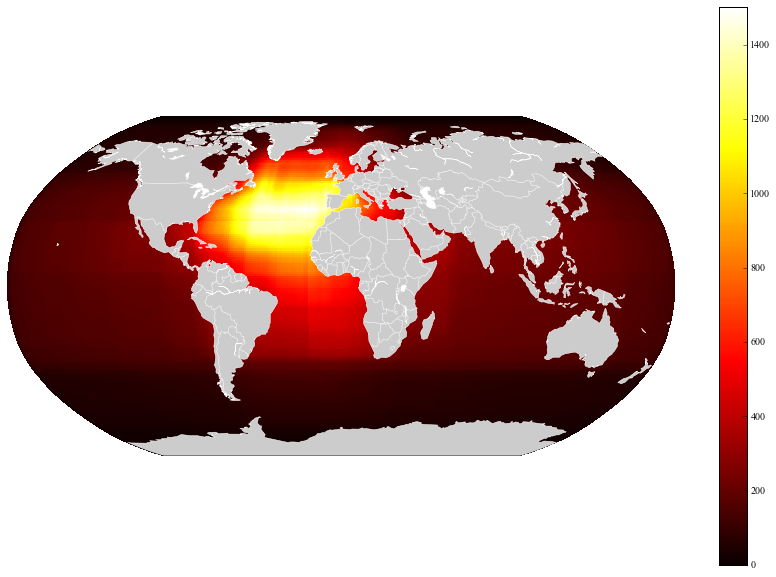

In [63]:
cmap = plt.cm.hot
fig = plt.figure(figsize=(15, 10))
m.drawmapboundary(color='w')
m.pcolor(lonmap, latmap, rectangle_sum, cmap=cmap)
#plt.plot(lonmeanmap, latmeanmap, 'wo', markerfacecolor='w', markeredgecolor='w', markersize=0.5)
m.drawcountries(linewidth=0.5, color='w')
m.drawcoastlines(linewidth=0.5, color='w')
m.fillcontinents()
cbar = plt.colorbar()
plt.show()

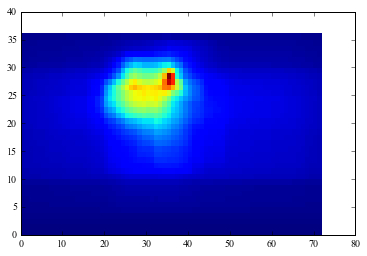

In [49]:
plt.pcolormesh(rectangle_sum)
plt.show()

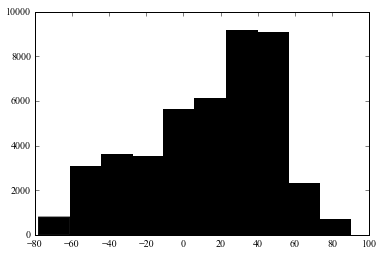

In [58]:
plt.hist(latmean)
plt.show()

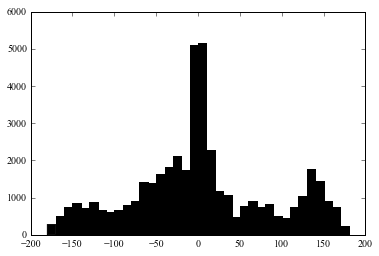

In [60]:
bins = np.arange(-180., 180.00001, 10.)
plt.hist(lonmean, bins)
plt.show()

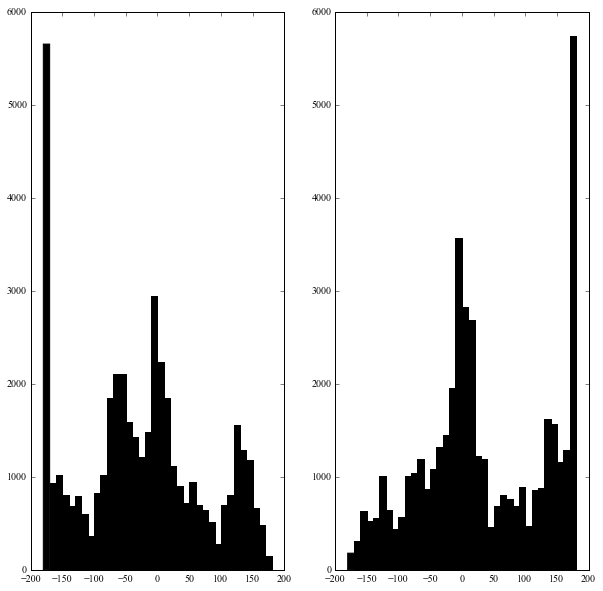

In [64]:
bins = np.arange(-180., 180.00001, 10.)
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(121)
plt.hist(lon_min, bins)
ax = plt.subplot(122)
plt.hist(lon_max, bins)
plt.show()